<a href="https://colab.research.google.com/github/sipocz/_earthQuake/blob/main/_earthquake_distance_pos_keras_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow


In [2]:


_PCVERSION_=False


if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin"
else:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#--------------

def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")


def checkvalues(df,columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")


def createcolumn(df,columnname,keys):
    print(f"{columnname} cseréje megy")
    for key in keys:
        df[keys[key]]=0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1


def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+str(i)
    return o

def create_base_data(df):
    t=['n', 't', 'o']
    columnname="land_surface_condition"
    key=create_dict(columnname,t)


    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t= ['h', 'w', 'i', 'r', 'u']
    columnname="foundation_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['q', 'n', 'x']
    columnname="roof_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['z', 'v', 'f', 'm', 'x']
    columnname="ground_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['q', 's', 'j', 'x']
    columnname="other_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['j', 's', 't', 'o']
    columnname="position"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['c', 's', 'f', 'd', 'm', 'a', 'q', 'u', 'n', 'o']
    columnname="plan_configuration"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=['a', 'w', 'r', 'v']
    columnname="legal_ownership_status"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    # level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    # level1:0--30
    # level2: 0.0000-----------0.9999
    # level3: 0.000000000------0.000099999
    '''
    l1=df.geo_level_1_id
    l2=(df.geo_level_2_id/1427*9999)/10000
    l3=(df.geo_level_2_id/12567*99999)/1000000000
    df["geopos"]=l1+l2+l3
    '''
    return(df)



def kill_columns(df):
    notkey=["Unnamed: 0","building_id","legal_ownership_status", "land_surface_condition",	"foundation_type",	"roof_type",	"ground_floor_type",	"other_floor_type",	"position",	"plan_configuration"]
    for i in df.columns:
        #print(i)
        if i in notkey:
            df.drop(columns=[i], inplace=True)
    return df







Mounted at /content/drive


In [3]:
def check_similarity_np(np1,np2):
    db=0
    maxi=0
    for ind, i1 in enumerate(np1):
        maxi+=1
        i2=np2[ind]
        if i1!=i2:
            db+=1
    #print(f"{ind}. eset:  {i:3},{i2:3}")
    print(f"hiba:{db} max:{maxi} -- error:{db/maxi*100.0 : 2.6} good %:{100-db/maxi*100.0 : 2.6} %")
    return(1-db/maxi)

In [4]:
#
#X_train_ok=kill_columns(X_train_conv)
#X_pred_ok=kill_columns(X_pred_conv)
#y_train_ok=kill_columns(y_train)



#X_train_ok.to_csv(basedir+"/tmp/X_tran_ok.csv",index=False)
#X_pred_ok.to_csv(basedir+"/tmp/X_pred_ok.csv",index=False)
#y_train_ok.to_csv(basedir+"/tmp/y_train_ok.csv",index=False)




#f=open(basedir+"/tmp/similarity.csv","a")
X_train_ok=pd.read_csv(basedir+"/tmp/X_tran_ok.csv",)
X_pred_ok=pd.read_csv(basedir+"/tmp/X_pred_ok.csv")
y_train_ok=pd.read_csv(basedir+"/tmp/y_train_ok.csv")

X_train_ok.head()
X_pred_ok.head()
#print("Ready")

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_t,land_surface_condition_o,foundation_type_h,foundation_type_w,foundation_type_i,foundation_type_r,foundation_type_u,roof_type_q,roof_type_n,roof_type_x,ground_floor_type_z,ground_floor_type_v,ground_floor_type_f,ground_floor_type_m,ground_floor_type_x,other_floor_type_q,other_floor_type_s,other_floor_type_j,other_floor_type_x,position_j,position_s,position_t,position_o,plan_configuration_c,plan_configuration_s,plan_configuration_f,plan_configuration_d,plan_configuration_m,plan_configuration_a,plan_configuration_q,plan_configuration_u,plan_configuration_n,plan_configuration_o,legal_ownership_status_a,legal_ownership_status_w,legal_ownership_status_r,legal_ownership_status_v
0,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [5]:
y_train_ok

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [6]:
X_pred_ok=kill_columns(X_pred_ok)
X_train_ok=kill_columns(X_train_ok)
y_train_ok=kill_columns(y_train_ok)

t=[1, 2, 3]
columnname="damage_grade"
key=create_dict(columnname,t)


checkvalues(y_train_ok,columnname,key)
createcolumn(y_train_ok,columnname,key)

damage_grade ellenőrzése !

260601 mintából 0 db nem volt megfelelő
damage_grade cseréje megy


In [7]:
y_train_ok["damage_grade"]=y_train_ok["damage_grade"]-1

In [8]:
y_train_ok

,damage_grade,damage_grade_1,damage_grade_2,damage_grade_3
0,2,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,0,1,0
4,2,0,0,1
...,...,...,...,...
260596,1,0,1,0
260597,2,0,0,1
260598,2,0,0,1
260599,1,0,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler2=MinMaxScaler()
X_train_scale=scaler2.fit_transform(X_train_ok)

#scaler1=StandardScaler()
X_pred_scale=scaler2.fit_transform(X_pred_ok)
"""
scaler3=StandardScaler()
y_train_scale=scaler3.fit_transform(y_train_ok)
"""
y_train_np=y_train_ok.to_numpy()

# szétszedjük a train és test részekre
from sklearn.model_selection import train_test_split
#X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_scale, test_size=0.10, random_state=0)
X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_np, test_size=0.1, random_state=0)




In [10]:
y_train_np

array([[2, 0, 0, 1],
       [1, 0, 1, 0],
       [2, 0, 0, 1],
       ...,
       [2, 0, 0, 1],
       [1, 0, 1, 0],
       [2, 0, 0, 1]])

In [11]:
def outlierDropfrom_df(df,inxlist):
    a=df
    out=a.drop(inxlist,axis=0)
    return(out)

In [12]:
def outlierDropfrom_numpyarray(na,inxlist):
    
    out=np.delete (na ,inxlist, axis=0)
    return(out)

In [13]:
def calc_the_range(y_train,hist):    
    num1=sum(1 for val in y_train if val==1)
    #print(num1)
    num2=sum(1 for val in y_train if val==2)
    #print(num2)
    num3=sum(1 for val in y_train if val==3)
    #print(num3)
    
    out=(num1,num1+num2,num1+num2+num3)
    print("out: " ,out)
    steps=[]
    for i in range(len(hist[0])):
        print(hist[0][i], end="")
        if hist[0][i]>out[0]:
            steps.append(i)
            break
    for i in range(len(hist[0])):
        #print(hist[0][i])
        if hist[0][i]>out[1]:
            steps.append(i)
            break
    print("step:",steps)
    limits_out=(hist[1][steps[0]],hist[1][steps[1]])
    print("Limits:",limits_out)
    return (limits_out)

In [14]:
def conv_a_floatlist(alist, range_x):
    o=[]
    print("conv:" ,range_x)
    for i in alist:
        if i<range_x[0]:
            o.append(1)
        if range_x[0]<= i <range_x[1]:
            o.append(2)
        if range_x[1]<=i:
            o.append(3)
    return(o)

In [15]:
y0=[pos for pos in range(len(y_train_train)) if y_train_np[pos,0]==0]
y1=[pos for pos in range(len(y_train_train)) if y_train_np[pos,0]==1]
y2=[pos for pos in range(len(y_train_train)) if y_train_np[pos,0]==2]


y_train_np[[111,112,113,114,115],0]
y_train_np[y2,0]
yall=y0+y1+y0+y2+y0+y2+y0+y0+y0
len(yall)

426091

In [16]:
import collections, numpy

o=collections.Counter(y_train_np[yall,0])
a0=o[0]
a1=o[1]
a2=o[2]
print((a1)/(a1+a2+a0))

0.31304345785289994


In [17]:


from tensorflow.keras.layers  import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adadelta, Adagrad, Ftrl
from tensorflow.keras.metrics import FalseNegatives 


In [18]:
def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Baseline model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Baseline model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [19]:
# ide jöhet a tensorflow
data_row=X_train_train.shape[0]
data_column=X_train_train.shape[1]





In [20]:

print("HELLO")

HELLO


In [114]:
import tensorflow as tf
from keras import losses 
from keras import optimizers 
from keras import metrics 


hidden_size=180
hidden_size2=180
hidden_size3=180
hidden_size4=180
hidden_size5=180

drop_frac1=0.40
drop_frac2=0.30
drop_frac3=0.20
lambda_1=0.0001
lambda_2=0.0001
lambda_3=0.0001

r1_reg= tf.keras.regularizers.L2(lambda_1)
r2_reg= tf.keras.regularizers.L2(lambda_2)
r3_reg= tf.keras.regularizers.L2(lambda_3)


inputs=Input(shape=(data_column,))
hidden_output=Dense(hidden_size,activation="linear")(inputs)
d1=Dropout(drop_frac1)(hidden_output)

hidden_output2=Dense(hidden_size2,activation="relu")(d1)
d2=Dropout(drop_frac2)(hidden_output2)

hidden_output3=Dense(hidden_size3,activation="relu")(d2)
d3=Dropout(drop_frac3)(hidden_output3)

hidden_output4=Dense(hidden_size4,activation="relu")(d3)
d4=Dropout(drop_frac3)(hidden_output4)

hidden_output5=Dense(hidden_size5,activation="relu")(d4)
d5=Dropout(drop_frac3)(hidden_output5)

prediction=Dense(3,activation="sigmoid")(d5)

model2=Model(inputs=inputs, outputs=prediction)


optimizer=Adadelta(learning_rate = 0.1, rho = 0.195)

#optimizer=Adamax(learning_rate = 0.1, beta_1 = 0.9, beta_2 = 0.999)
#    optimizer = SGD(learning_rate=0.05, momentum=0.02, nesterov=False, name='SGD')
#optimizer=Adam()
model2.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],)


In [107]:
n=1

In [33]:
y_train_train[:,0]

array([1, 2, 1, ..., 2, 2, 1])

In [34]:
len(yall)

426091

In [ ]:



history=model2.fit(x=X_train_train[yall] ,y=y_train_train[yall,0], validation_data=(X_train_test[:],y_train_test[:,0]),epochs=5000, batch_size=6100, shuffle=True, verbose=1)


n+=1
model2.save(basedir+"/model"+str(n))
display_history(history)





A streamkimeneten csak az utolsó 5000 sor látható.
Epoch 2371/5000
70/70 [==============================] - 1s 8ms/step - loss: 0.6494 - accuracy: 0.7027 - val_loss: 0.6535 - val_accuracy: 0.7052
Epoch 2372/5000
70/70 [==============================] - 1s 10ms/step - loss: 0.6501 - accuracy: 0.7022 - val_loss: 0.6538 - val_accuracy: 0.7061
Epoch 2373/5000
70/70 [==============================] - 1s 8ms/step - loss: 0.6500 - accuracy: 0.7023 - val_loss: 0.6535 - val_accuracy: 0.7047
Epoch 2374/5000
70/70 [==============================] - 1s 8ms/step - loss: 0.6504 - accuracy: 0.7026 - val_loss: 0.6536 - val_accuracy: 0.7049
Epoch 2375/5000
70/70 [==============================] - 1s 8ms/step - loss: 0.6500 - accuracy: 0.7021 - val_loss: 0.6536 - val_accuracy: 0.7045
Epoch 2376/5000
70/70 [==============================] - 1s 8ms/step - loss: 0.6499 - accuracy: 0.7020 - val_loss: 0.6537 - val_accuracy: 0.7052
Epoch 2377/5000
70/70 [==============================] - 1s 8ms/step - loss: 0

In [1]:
n+=1
model2.save(basedir+"/model"+str(n))
display_history(history)

NameError: ignored

In [ ]:
y_pred2=model2.predict(X_train_test)

In [ ]:
for i in range(360,460):
    print(f"AA: {y_pred2[i]} ,{y_train_test[i][0]}")

AA: [0.01095079 0.6896282  0.29942104] ,1
AA: [0.03169058 0.54476136 0.42354804] ,1
AA: [0.02172124 0.5174553  0.46082345] ,2
AA: [0.05001725 0.5813405  0.3686423 ] ,2
AA: [0.03709028 0.46366206 0.49924773] ,2
AA: [0.68945533 0.28639403 0.0241506 ] ,0
AA: [0.03707057 0.64452    0.31840944] ,2
AA: [0.03882314 0.61296904 0.3482077 ] ,1
AA: [0.02514983 0.6322316  0.3426186 ] ,1
AA: [0.0286265  0.5799484  0.39142516] ,2
AA: [0.08648346 0.6679853  0.24553119] ,1
AA: [0.02888301 0.5072944  0.46382257] ,1
AA: [0.0841221  0.5881576  0.32772028] ,1
AA: [0.02515733 0.5724324  0.40241027] ,0
AA: [0.05699509 0.64196026 0.3010446 ] ,1
AA: [0.02611716 0.52050674 0.4533761 ] ,1
AA: [0.03032296 0.6180668  0.3516103 ] ,1
AA: [0.06218528 0.6028262  0.3349886 ] ,1
AA: [0.05302667 0.7644114  0.18256187] ,2
AA: [0.05473546 0.6989038  0.24636069] ,1
AA: [0.05595162 0.62248576 0.32156268] ,1
AA: [0.05710032 0.5984938  0.34440595] ,2
AA: [0.03414586 0.5093337  0.45652047] ,2
AA: [0.0565316  0.53058094 0.41288

In [ ]:
y_pred2.shape

(26061, 3)

In [ ]:



from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=2000)
LR.fit(X_train_train,y_train_train[:,1])
LR_score2=LR.score(X_train_test,y_train_test[:,1] )



In [ ]:
LR_res=[]
for i in range(0,4):
    LR=LogisticRegression(max_iter=2000)
    LR.fit(X_train_train,y_train_train[:,i])
    LR_score=LR.score(X_train_test,y_train_test[:,i] )    
    LR_res.append(LR_score)

In [ ]:
DT_res=[]
from sklearn.tree import DecisionTreeClassifier

for i in range(0,4):
    DT=DecisionTreeClassifier()
    DT.fit(X_train_train,y_train_train[:,i])
    DT_score=DT.score(X_train_test,y_train_test[:,i] )    
    DT_res.append(DT_score)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LD_res=[]
for i in range(0,4):
    LD=LinearDiscriminantAnalysis()
    LD.fit(X_train_train,y_train_train[:,i])
    LD_score=LD.score(X_train_test,y_train_test[:,i] )    
    LD_res.append(LD_score)


In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_res=[]
for i in range(0,4):
    GNB=GaussianNB()
    GNB.fit(X_train_train,y_train_train[:,i])
    GNB_score=GNB.score(X_train_test,y_train_test[:,i] )    
    GNB_res.append(GNB_score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN_res=[]
for i in range(0,4):
    KN=KNeighborsClassifier()
    KN.fit(X_train_train,y_train_train[:,i])
    KN_score=KN.score(X_train_test,y_train_test[:,i] )    
    KN_res.append(KN_score)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA_res=[]
for i in range(0,4):
    ADA=AdaBoostClassifier(n_estimators=300)
    ADA.fit(X_train_train,y_train_train[:,i])
    ADA_score=ADA.score(X_train_test,y_train_test[:,i] )    
    ADA_res.append(ADA_score)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_res=[]
for i in range(0,4):
    GBC=GradientBoostingClassifier(n_estimators=200)
    GBC.fit(X_train_train,y_train_train[:,i])
    GBC_score=GBC.score(X_train_test,y_train_test[:,i] )    
    GBC_res.append(GBC_score)

In [95]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB_res=[]
for i in range(0,1):
    HGB=HistGradientBoostingClassifier(max_iter=3600, verbose=1, tol=1e-8)
    HGB.fit(X_train_train[yall],y_train_train[yall,i])
    HGB_score=HGB.score(X_train_test,y_train_test[:,i] )    
    HGB_res.append(HGB_score)

Binning 0.046 GB of training data: 0.269 s
Fitting gradient boosted rounds:
[1/3600] 3 trees, 93 leaves (31 on avg), max depth = 10, in 0.137s
[2/3600] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.152s
[3/3600] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.162s
[4/3600] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.152s
[5/3600] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.150s
[6/3600] 3 trees, 93 leaves (31 on avg), max depth = 13, in 0.178s
[7/3600] 3 trees, 93 leaves (31 on avg), max depth = 13, in 0.131s
[8/3600] 3 trees, 93 leaves (31 on avg), max depth = 16, in 0.132s
[9/3600] 3 trees, 93 leaves (31 on avg), max depth = 15, in 0.141s
[10/3600] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.141s
[11/3600] 3 trees, 93 leaves (31 on avg), max depth = 15, in 0.130s
[12/3600] 3 trees, 93 leaves (31 on avg), max depth = 13, in 0.137s
[13/3600] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.155s
[14/3600] 3 trees, 93 leaves (31 on avg), max dep

In [96]:
HGB_res

[0.7051338011617365]

In [ ]:
GBC_res

[0.6929511530639653,
 0.9213383983730479,
 0.6886151720962358,
 0.7668163155673228]

from sklearn.svm import SVC
SVC_res=[]
for i in range(1,4):
    SVC=SVC()
    SVC.fit(X_train_train,y_train_train[:,i])
    SVC_score=SVC.score(X_train_test,y_train_test[:,i] )    
    SVC_res.append(SVC_score)


In [ ]:
HGB_res

[0.7429492344883158]

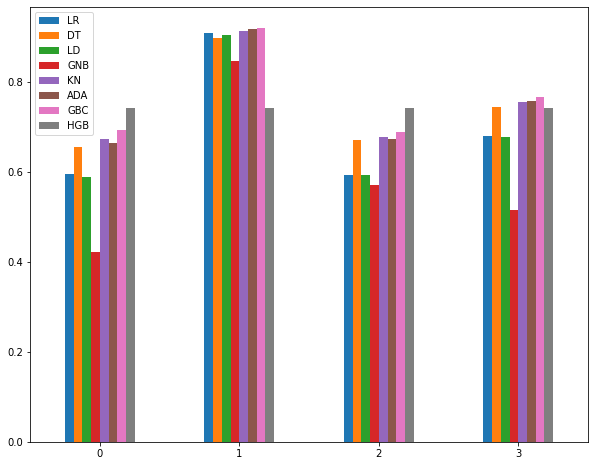

In [ ]:
df=pd.DataFrame({'LR' : LR_res, 'DT': DT_res,'LD':LD_res,'GNB':GNB_res, 'KN': KN_res,'ADA':ADA_res,'GBC':GBC_res,"HGB":HGB_res}, index=['0','1',"2","3"])
df.plot.bar(rot=0,figsize=(10,8));

In [ ]:
 HGB=HistGradientBoostingClassifier(max_iter=1100,verbose=1,max_leaf_nodes=99,n_iter_no_change=50,   early_stopping=False,warm_start=True)

In [ ]:
HGB_res2=[]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB.set_params(max_iter=5100)
for i in [0]:
    HGB.fit(X_train_train,y_train_train[:,i])
    HGB_score=HGB.score(X_train_test,y_train_test[:,i] )    
    HGB_res2.append(HGB_score)


ves (99 on avg), max depth = 17, in 0.251s
[4823/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.177s
[4824/5100] 3 trees, 297 leaves (99 on avg), max depth = 20, in 0.222s
[4825/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.255s
[4826/5100] 3 trees, 297 leaves (99 on avg), max depth = 20, in 0.187s
[4827/5100] 3 trees, 297 leaves (99 on avg), max depth = 28, in 0.240s
[4828/5100] 3 trees, 297 leaves (99 on avg), max depth = 20, in 0.199s
[4829/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.288s
[4830/5100] 3 trees, 297 leaves (99 on avg), max depth = 18, in 0.196s
[4831/5100] 3 trees, 297 leaves (99 on avg), max depth = 21, in 0.276s
[4832/5100] 3 trees, 297 leaves (99 on avg), max depth = 23, in 0.222s
[4833/5100] 3 trees, 297 leaves (99 on avg), max depth = 20, in 0.328s
[4834/5100] 3 trees, 297 leaves (99 on avg), max depth = 21, in 0.197s
[4835/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.311s
[4836/5100] 3 trees, 297 leaves (9

In [ ]:
HGB_res2

[0.7254518245654427]

In [ ]:
pred = HGB.predict(X_train_test)
print(confusion_matrix(y_train_test[:,0], pred))

[[ 1303  1177    60]
 [  638 12014  2160]
 [   70  3050  5589]]


In [ ]:
# ITT kezdődik az okítási ciklus IDe jön vissza

In [ ]:
def reconvert (X):
    yo=[]
    o=1
    y1=X
    for idx,_ in enumerate(y1):
       if y1[idx][0]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=1
       if y1[idx][1]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=2
       if y1[idx][2]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=3
       '''
       ox=o
       if ox==3 and yerror[idx]:
           o=2
       if ox==1 and yerror[idx]:
           o=2
       if ox==2 and yerror[idx]:
           # 2 eset van 
           if y3[idx]>y1[idx]:
               o=3
           else:
               o=1

       '''
       
       yo.append(o)
    return(yo)
    

In [ ]:

yhibaold=[]
maxlen=len(y_train_train)
#maxlen=1000
stimm=0
for idx,_ in enumerate(y1):
    if idx in range(0,maxlen):
        ou1=y1[idx]
        ou2=y2[idx]
        ou3=y3[idx]
        ouh=yhiba_pred[idx]
        match=(y_train_train[idx][0]==1 and ou1==max(ou1,ou2,ou3)) or (y_train_train[idx][0]==2 and ou2==max(ou1,ou2,ou3)) or (y_train_train[idx][0]==3 and ou3==max(ou1,ou2,ou3)) 
        if match:
            yhibaold.append(0)
            stimm+=1
        else:
            yhibaold.append(1)
        if idx%10000==1:
            print(f"{y_train_train[idx]} :{ou1:6.3f} _ {ou2:6.3f} _ {ou3:6.3f} _ {match}_{ouh:6.3f}")

print(maxlen,stimm,stimm/maxlen) 
#print(yhiba)



NameError: name 'y1' is not defined

In [ ]:
def show_similarity(a,b):
    for i in range(min(len(a),1000)):
        print(f"{a[i]}-{b[i]} ",end="")

In [ ]:
def search_outliers(y_t1,y_pred,X_orig,yrealpred):
    y1=[] # y orig 
    x1=[] # X orig
    yp=[] # y predikt
    yrp=[] # y predicted real value
    for inx,i in enumerate(y_t1):
        if y_t1[inx][0]==y_pred[inx]:
            pass
        else:
            y1.append(y_t1[inx][0])
            x1.append(X_orig[inx])
            yp.append(y_pred[inx])
            yrp.append(yrealpred[inx])
    out=(y1,yp,x1,yrp)
    return out






In [ ]:
# futtass ez felett !!

In [ ]:
ypred2=ann2(X_train_test)
io=reconvert(ypred2)
check_similarity_np(io,y_train_test[:,0])

hiba:698 max:2607 -- error: 26.7741 good %: 73.2259 %


0.7322593018795551

In [ ]:
ypred1=ann2.predict(X_train_train)
io=reconvert(ypred1)
check_similarity_np(io,y_train_train[:,0])

hiba:67590 max:257994 -- error: 26.1983 good %: 73.8017 %


0.7380171631898416

In [ ]:
ypred1

array([[0.15499848, 0.76536214, 0.0816348 ],
       [0.00503527, 0.14800292, 0.8563725 ],
       [0.45224142, 0.5335499 , 0.01439941],
       ...,
       [0.2014128 , 0.5197657 , 0.3004445 ],
       [0.01349376, 0.28768444, 0.70185846],
       [0.0423561 , 0.74841315, 0.21801093]], dtype=float32)

In [ ]:
#outfile generation
y_pred_ok=ann2.predict(X_pred_scale)
io=reconvert( y_pred_ok)

X_pred_bd=pd.read_csv(basedir+"/orig/test_values.csv")

#y_pred_ok_int=conv_a_floatlist(y_pred_ok,range_x)

In [ ]:
buildingid=X_pred_bd["building_id"]

head2=y_pred_ok


outdf=pd.DataFrame(data={"damage_grade":io} ,index=buildingid)
outdf.index.name="building_id"


outdf.head()
st=43
sts=str(st)
outdf.to_csv(basedir+"/out/submission_"+sts+"_xgboost.csv")
print()
print(basedir+"/out/submission_"+sts+"_xgboost.csv")


C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin/out/submission_43_xgboost.csv


In [ ]:
if not( _PCVERSION_):
    !head "/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin/out/submission_24_xgboost.csv"

In [ ]:
X_pred_scale

array([[0.28571429, 0.0201005 , 0.06593407, ..., 0.        , 1.        ,
        0.56170323],
       [0.14285714, 0.02512563, 0.13186813, ..., 0.        , 1.        ,
        0.19576828],
       [0.14285714, 0.00502513, 0.03296703, ..., 0.        , 1.        ,
        0.71028087],
       ...,
       [0.        , 0.05025126, 0.02197802, ..., 0.        , 1.        ,
        0.73558512],
       [0.14285714, 0.00502513, 0.08791209, ..., 0.        , 0.        ,
        0.21615666],
       [0.14285714, 0.01005025, 0.10989011, ..., 0.        , 1.        ,
        0.83998508]])

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" title="Python Logo"/>